# Problemas Numéricos: Mecânica Newtoniana
## FIS0615 - Mecânica Clássica I
### Docente: Prof. Dr. Edimilson alguma coisa
### Discente: Assinem o nome de vcs, Ylana Karolina Santos Lopes
### 31/03/2025

### Índice:
- [1. Movimento horizontal de uma partícula sujeita a uma força variável no tempo.](#1.-Movimento-horizontal-de-uma-partícula-sujeita-a-uma-força-variável-no-tempo.)


- [2. Movimento vertical com resistência de uma partícula.](#2.-Movimento-vertical-com-resistência-de-uma-partícula.)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import cumtrapz


%matplotlib inline


### 1. Movimento horizontal de uma partícula sujeita a uma força variável no tempo.

Uma partícula de massa 𝑚=1 kg está sujeita a uma força unidimensional $𝐹(𝑡)=𝑘𝑡𝑒^{−𝛼𝑡}$, onde 𝑘=1 N/s e 𝛼=0.5 s−1. Se a partícula estiver inicialmente em repouso, calcule e elabore um gráfico da posição, velocidade e aceleração da partícula como função do tempo.

In [17]:
def f(t):
    return k*t*np.exp(-alpha*t)


t = np.linspace(0,20,50)
m = 1 # kg
k = 1 # N/s
alpha = 0.5 # s^-1
v0 = 0

a = f(t)/m # usando lei de newton f = ma

v_t = cumtrapz(a, t, initial=0)  # Velocidade
x_t = cumtrapz(v_t, t, initial=0)  # Posição


C:\Users\ylana\AppData\Local\Temp\ipykernel_20340\3945845770.py:13: DeprecationWarning: 'scipy.integrate.cumtrapz' is deprecated in favour of 'scipy.integrate.cumulative_trapezoid' and will be removed in SciPy 1.14.0
  v_t = cumtrapz(a, t, initial=0)  # Velocidade
C:\Users\ylana\AppData\Local\Temp\ipykernel_20340\3945845770.py:14: DeprecationWarning: 'scipy.integrate.cumtrapz' is deprecated in favour of 'scipy.integrate.cumulative_trapezoid' and will be removed in SciPy 1.14.0
  x_t = cumtrapz(v_t, t, initial=0)  # Posição


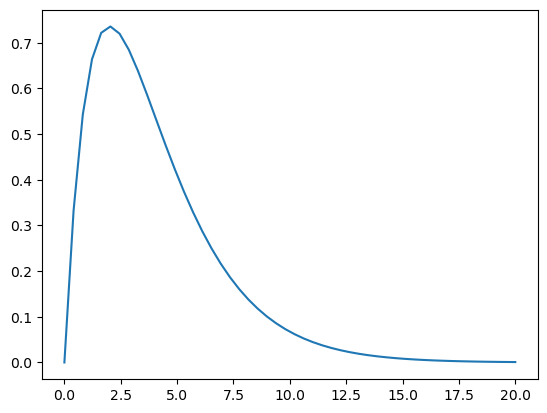

In [18]:
# aceleração
plt.plot(t, a)

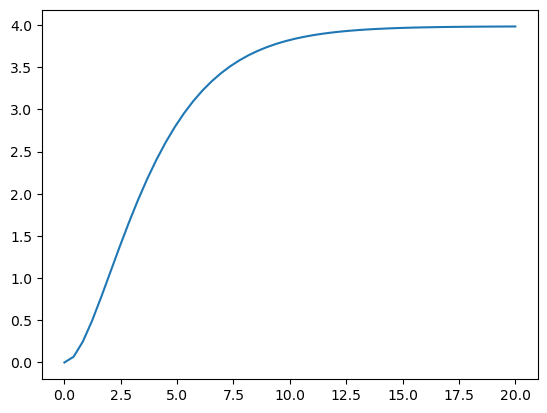

In [19]:
plt.plot(t, v_t)

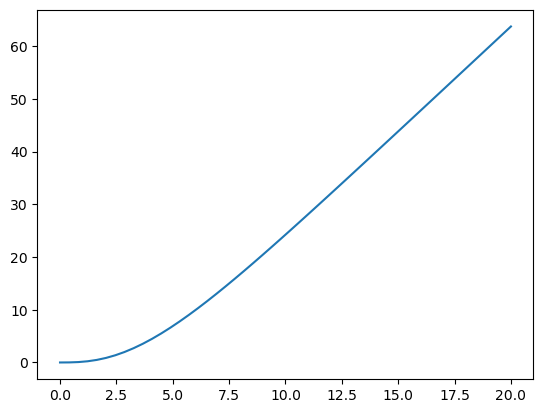

In [20]:
plt.plot(t, x_t)

### 2. Movimento vertical com resistência de uma partícula.

**Enunciado:** Uma partícula de massa 𝑚 está submetida ao movimento vertical em um determinado meio com uma força de retardo proporcional a velocidade.

(a) Determine o deslocamento e a velocidade de movimento vertical da partícula.

(b) Elabore gráficos de 𝑦(𝑡) para $𝑣_0 = 0,|𝑣⃗_0|<|𝑣⃗_𝑡| e |𝑣⃗_0|>|𝑣⃗_𝑡|$, onde $𝑣⃗_𝑡$ é a velocidade terminal.

(c) Elabore gráficos de 𝑣(𝑡) para $𝑣_0 = 0,|𝑣⃗_0|<|𝑣⃗_𝑡| e |𝑣⃗_0|>|𝑣⃗_𝑡|$, onde $𝑣⃗_𝑡$ é a velocidade terminal.

**Solução analítica:** Considerando o movimento vertical com a única força atuando no corpo seja a gravitacional, temos a força de retardo e a gravitacional sendo:

$$F_r = - kv(t), \quad F_g = mg.$$
$$\vec F = m \vec a = mg - kmv.$$

Em que consideramos o sentido positivo como sendo para baixo. Assim, isolamos o $\vec a$ encontramos:

$$ \vec a (t) = g - kv \tag{1} $$

Como sabemos que $\vec a = d\vec v/dt$, podemos encontrar a equação diferencial da forma de (2):

$$ \frac{dv}{dt} = g - kv, $$
$$ \frac{dv}{dt} - kv = g. \tag{2}$$

Multiplicamos ambos os lados da equação, usando o fator de integração $\mu (t) = e^{\int kdt} = e^{kt}$ para encontrar uma forma que lembra a forma de uma regra do produto.

$$ \mu(t) \frac{dv}{dt} - \mu(t) kv = \mu(t) g.$$
$$\frac{d}{dt}(\mu \cdot v) = \mu g$$

Integrando dos dois lados em $t$:

$$\mu \cdot v = \int \mu(t) g dt = \int g e^{kt} dt$$ 

$$ v e^{kt} = \frac{g}{k} e^{kt} + C$$

Assim, encontramos a expressão para a velocidade. 

$$v(t) = \frac{g}{k} + Ce^{-kt}$$

Fazendo $t = 0$, podemos encontrar o valor de $C$:

$$v(0) = v_0 = \frac{g}{k} + C  ⟶  C = v_0 - \frac{g}{k}$$

De forma que encontramos a função da velocidade como sendo finalmente:

$$v(t) = \frac{g}{k} + (v_0 - \frac{g}{k})e^{-kt}$$


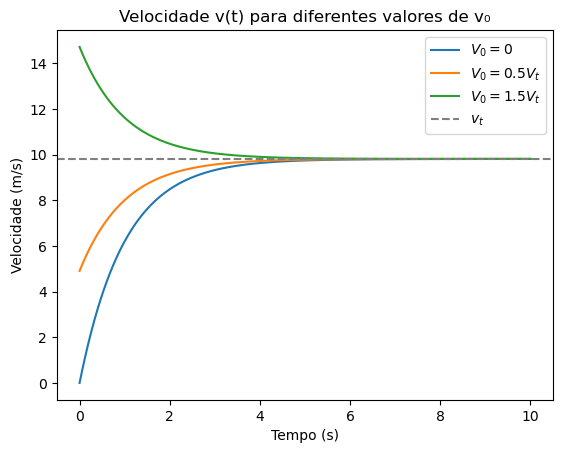

In [53]:
def v_func(t, v0):
    return g/k + (v0 - (g/k))*np.exp(-k*t)

g = 9.81 #m/s^2
k = 1 # Constante
vt = g/k

v0 = [0, 0.5*vt, 1.5 * vt]
label_list = [r'$V_0 = 0$', '$V_0 = 0.5 V_t$', '$V_0 = 1.5 V_t$']


for i in range(0,len(v0)):
    v = v_func(t, v0[i]) 
    plt.plot(t, v, label = label_list[i])
    
plt.axhline(vt, color='gray', linestyle='--', label=r"$v_t$")

plt.title("Velocidade v(t) para diferentes valores de v₀")
plt.xlabel("Tempo (s)")
plt.ylabel("Velocidade (m/s)")
plt.legend()